In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
"""

Data Feature Introduction

age: age of person

anaemia: Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

diabetes: If the patient has diabetes (boolean)

ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure: If the patient has hypertension (boolean)

platelets: Platelets in the blood (kiloplatelets/mL)

serum_creatinine: Level of serum creatinine in the blood (mg/dL)

serum_sodium: Level of serum sodium in the blood (mEq/L)


"""
data = pd.read_csv("heartData.csv") 
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


General info about data

In [ ]:
"""

data doesn't have any null value, all columns are numeric even categorical ones.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [ ]:
data.describe()
"""

platelets and creatinine_phosphokinase have very wide range

"""

'\n\nplatelets and creatinine_phosphokinase have very wide range\n\n'

Set label  and features

In [ ]:
sns.set()
sns.set_context("notebook")
featuresDf = data.drop(columns="DEATH_EVENT")
features = featuresDf.columns.values
labelDf = data["DEATH_EVENT"]
label = "DEATH_EVENT"

### Checking distribution of the non-categorical features 

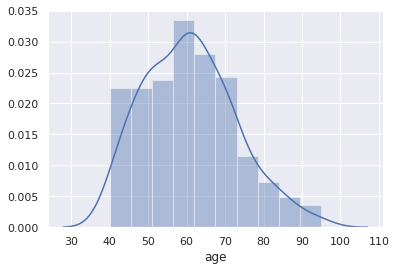

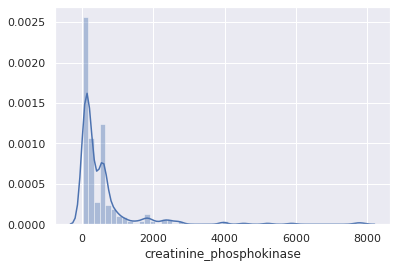

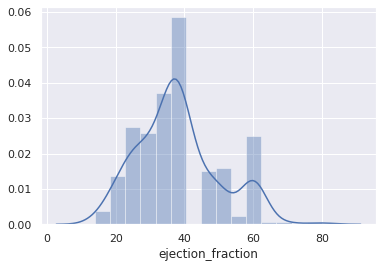

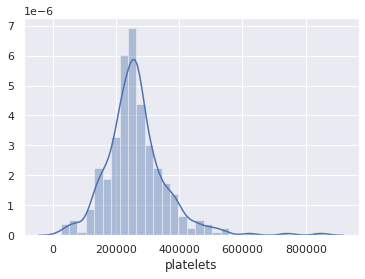

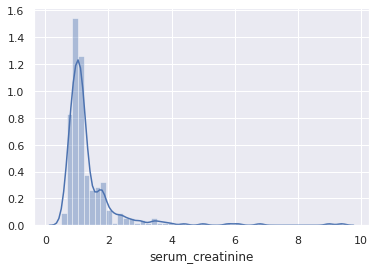

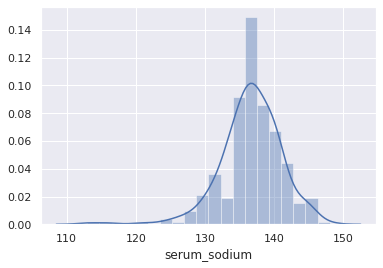

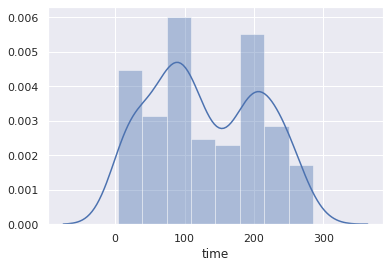

In [ ]:
for feature in features:
    data[feature] = data[feature].astype(float)
    uniqueValueCount = len(data[feature].unique())
    if(uniqueValueCount> 4):
        sns.distplot(data[feature])
        
    plt.show()

### Scatter for all feature pair combinations 

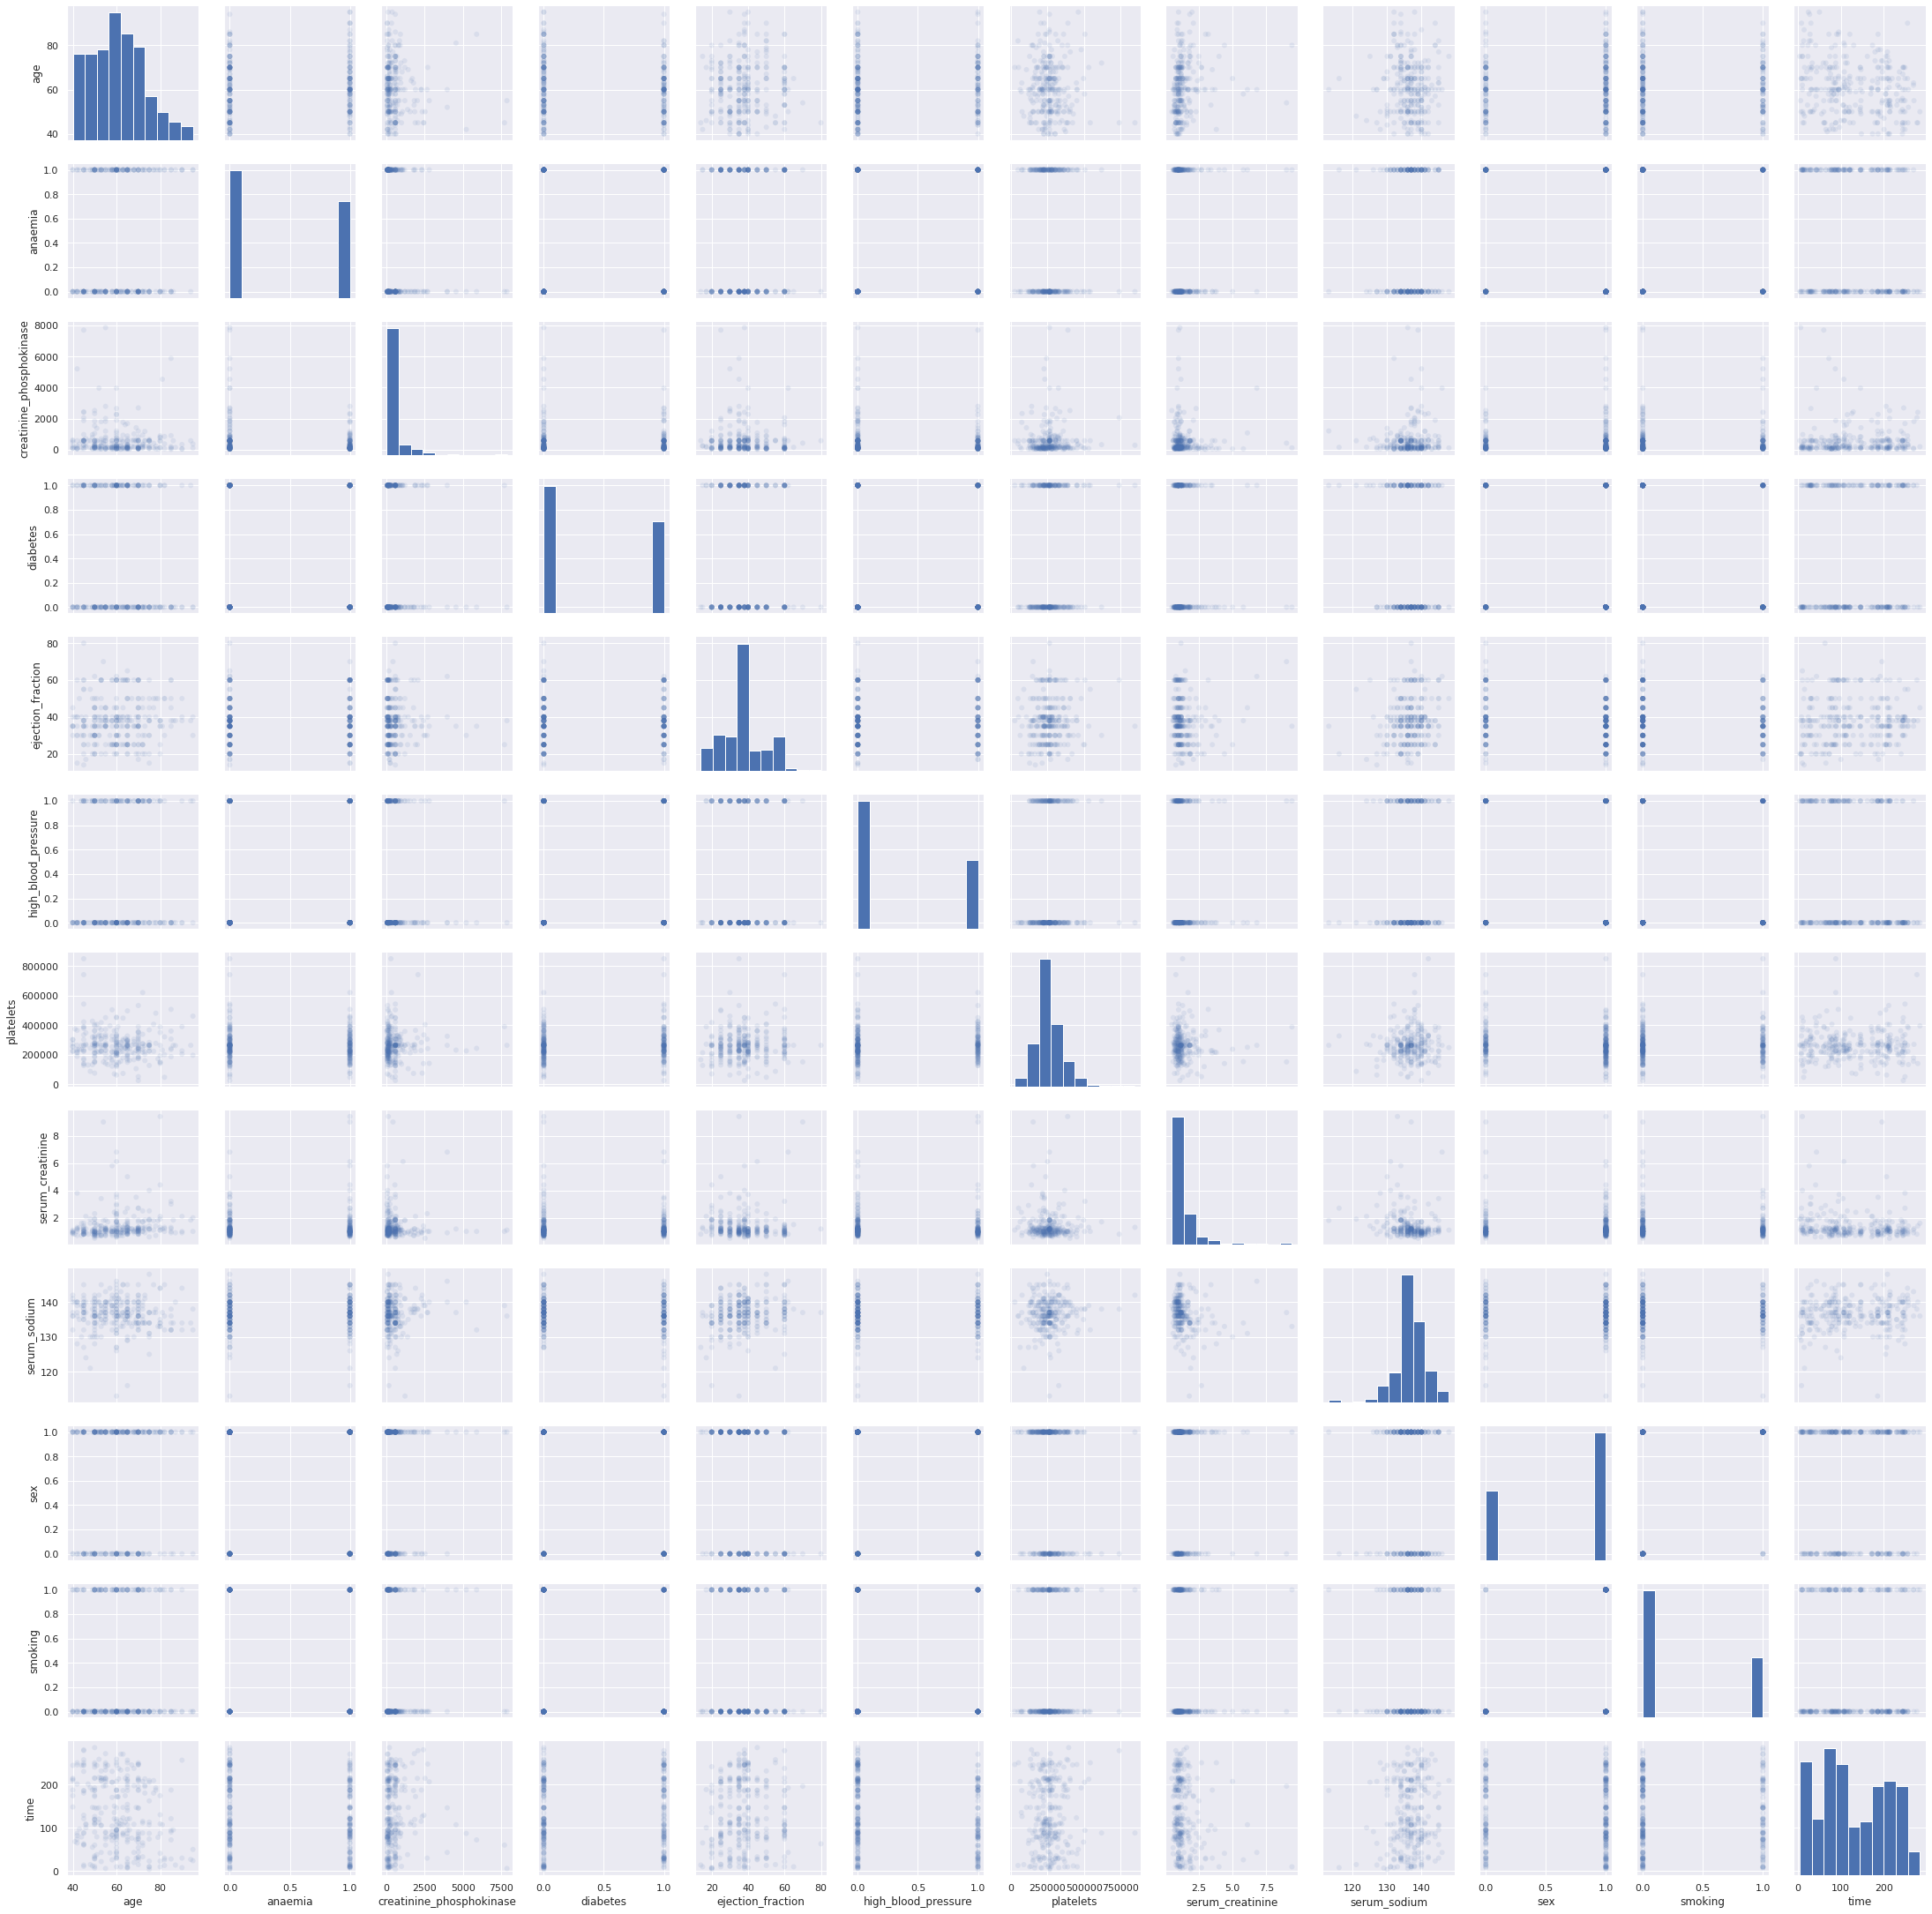

In [ ]:
sns.pairplot(featuresDf,plot_kws=dict(alpha=.1, edgecolor='none'))

### Let see all features' value distributions of both deceased and alive ones to compare, using swarmplot 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


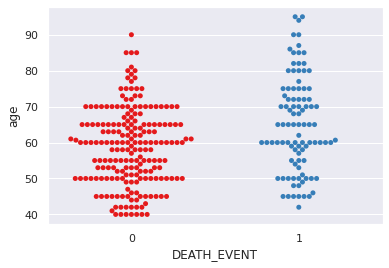

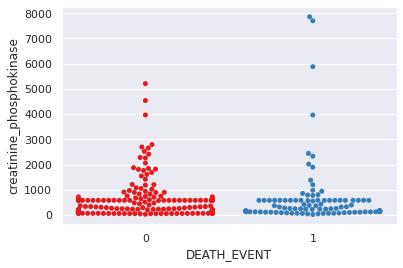

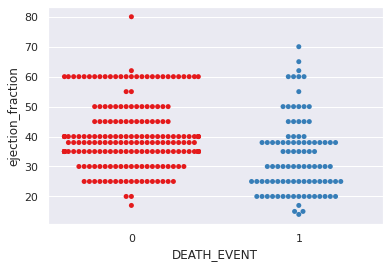

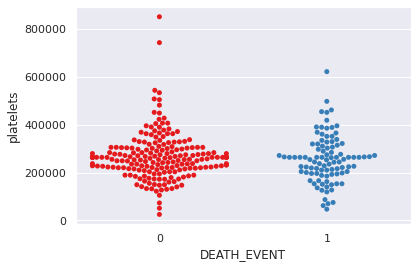

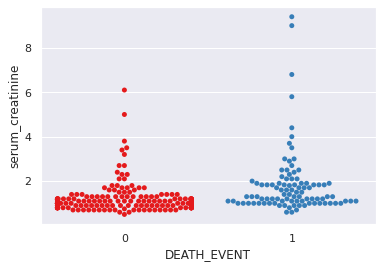

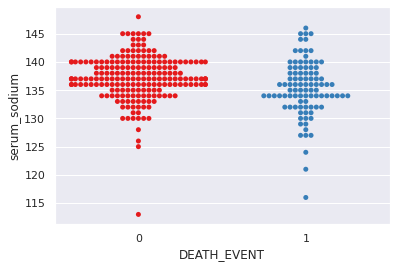

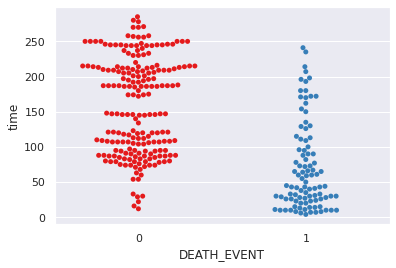

In [ ]:
for feature in features:
    data[feature] = data[feature].astype(float)
    uniqueValueCount = len(data[feature].unique())
    if(uniqueValueCount> 4):
        sns.swarmplot(x=label,y=feature,data=data,palette="Set1", split=True)
        
    plt.show()

### Let see correlation matrix to see correlations between features

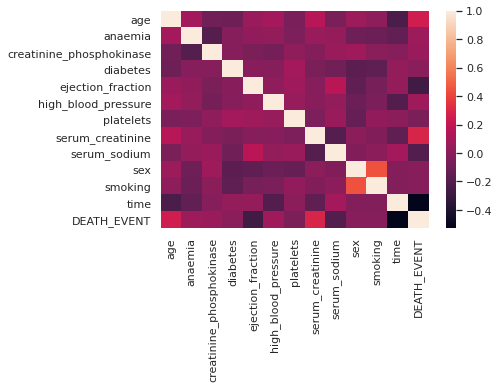

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


'\nSerum_creatinine has positive correlation with death with 0.29\nEjection_fraction has negative correlation with death with 0.26\nAge has positive correlation with death with 0.25 score\n\nSerum_creatinine, ejection_fraction and age have correlation among themselves\nso there is a possibility that they cause each other\n\nSmoking and Diabetes have a less or none effect on death of heart attack \n\n'

In [ ]:
def corr_matrix(data):
    cor_mat = data.corr()
    sns.heatmap(cor_mat)
    return cor_mat
cor_mat =corr_matrix(data)
plt.show()
CorrWithDeath = cor_mat["DEATH_EVENT"].drop(index="DEATH_EVENT")
print(CorrWithDeath)
"""
Serum_creatinine has positive correlation with death with 0.29
Ejection_fraction has negative correlation with death with 0.26
Age has positive correlation with death with 0.25 score

Serum_creatinine, ejection_fraction and age have correlation among themselves
so there is a possibility that they cause each other

Smoking and Diabetes have a less or none effect on death of heart attack 

"""

### Let see correlated value distributions of both deceased and alive ones to compare, using swarmplot  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


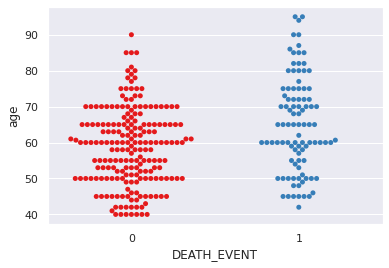

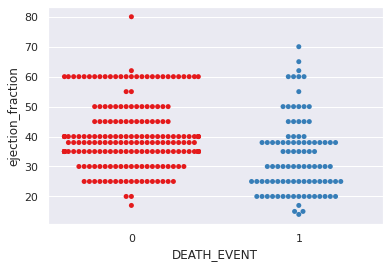

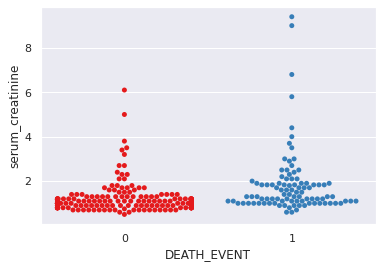

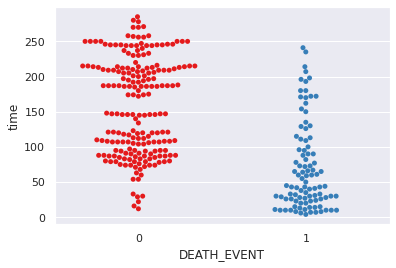

In [ ]:
"""
Deceased ones have low ejection_fraction values most likely,
due to its correlation. Oldest ones deceasing as expected.
Also the ones that have extreme serum_creatinine values are
the deceased ones.  

"""

DeathCorrelated  = ["age","ejection_fraction","serum_creatinine","time"]
for feature in DeathCorrelated:
    sns.swarmplot(x=label,y=feature,data=data,palette="Set1", split=True)
    plt.show()

# Lets focus on deceased ones

In [ ]:
deceased  = data.loc[data.DEATH_EVENT==1]
alive = data.loc[data.DEATH_EVENT==0]
print(deceased.head())
print(alive.head())

    age  anaemia  creatinine_phosphokinase  ...  sex  smoking  DEATH_EVENT
0  75.0        0                       582  ...    1        0            1
1  55.0        0                      7861  ...    1        0            1
2  65.0        0                       146  ...    1        1            1
3  50.0        1                       111  ...    1        0            1
4  65.0        1                       160  ...    0        0            1

[5 rows x 12 columns]
     age  anaemia  creatinine_phosphokinase  ...  sex  smoking  DEATH_EVENT
14  49.0        1                        80  ...    0        0            0
20  65.0        1                        52  ...    0        0            0
23  53.0        0                        63  ...    1        0            0
33  50.0        1                       159  ...    0        0            0
38  60.0        0                      2656  ...    1        0            0

[5 rows x 12 columns]


## Age distribution of the deceased ones

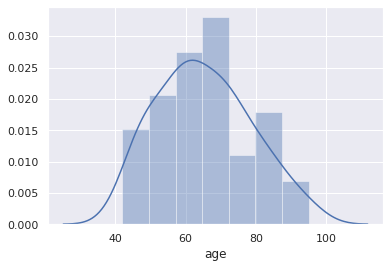

In [ ]:
sns.distplot(deceased.age)

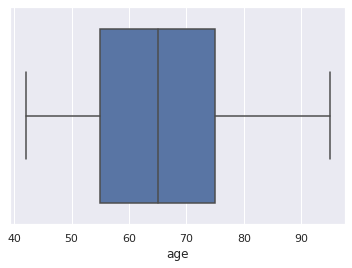

In [ ]:
sns.boxplot(deceased.age)

## Do ages of the people who died early have correlation with other features?

age                         1.000000
anaemia                     0.066246
creatinine_phosphokinase   -0.163145
diabetes                   -0.149389
ejection_fraction           0.216885
high_blood_pressure         0.054218
platelets                   0.072379
serum_creatinine            0.063218
serum_sodium                0.035503
sex                         0.171186
smoking                     0.117177
DEATH_EVENT                      NaN
Name: age, dtype: float64


'\nrejection_fraction has positive correlation with age with 0.21 value. \nThat means percentage of blood leaving the heart at each contraction increases by getting old on\ndeceased ones\n\n'

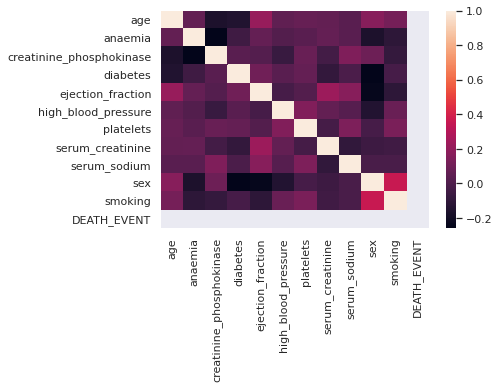

In [ ]:
cor_mat = corr_matrix(deceased)
print(cor_mat["age"])

"""
rejection_fraction has positive correlation with age with 0.21 value. 
That means percentage of blood leaving the heart at each contraction increases by getting old on
deceased ones

"""

In [ ]:
print(cor_mat["ejection_fraction"])

"""
Level of serum_creatinine in the blood
slightly causes increment of percentage of blood leaving the heart at each contraction

Also percentage of blood leaving the heart at each contraction is 
slghtly higher on men than women generally
"""

age                         0.216885
anaemia                     0.067672
creatinine_phosphokinase    0.021621
diabetes                    0.103865
ejection_fraction           1.000000
high_blood_pressure        -0.026012
platelets                   0.017271
serum_creatinine            0.229533
serum_sodium                0.172754
sex                        -0.241338
smoking                    -0.106528
DEATH_EVENT                      NaN
Name: ejection_fraction, dtype: float64


'\nLevel of serum_creatinine in the blood\nslightly causes increment of percentage of blood leaving the heart at each contraction\n\nAlso percentage of blood leaving the heart at each contraction is \nslghtly higher on men than women generally\n'

# Hypothesis Testing

Functions for correlation hypothesis testing

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import math
def MinMax(data,col):
   newCol = data[col].copy()
   newCol -= newCol.min()
   newCol /= data[col].max()
   return newCol   


from scipy.stats import ttest_ind

def correlationHypo(data,feature1, feature2,threshold=0.05):

  data1, data2 = data[feature1],data[feature2]
  stat0, p0 = pearsonr(data1,data2)
  stat, p = spearmanr(data1, data2)
  print('stat=%.3f, p=%.3f' % (stat, p))

  p = min(p,p0) 
  if p > threshold:
    print('p value {:.3} greater than {} that means they are probably independent\nNull Hypothesis Accepted!'.format(p,threshold))
  else:
    print('p value {:.3} lower than {} that means they are probably dependent\nNull Hypothesis Rejected!'.format(p,threshold))


Null Hypothesis: Serum_creatinine and ejection_fraction are not related
p = 0.05

In [ ]:
correlationHypo(data,"serum_creatinine","ejection_fraction")

stat=-0.178, p=0.002
p value 0.00201 lower than 0.05 that means they are probably dependent
Null Hypothesis Rejected!


Null Hypothesis: Age and ejection_fraction are not related
p = 0.05

In [ ]:
correlationHypo(data,"age","ejection_fraction")

stat=0.074, p=0.202
p value 0.202 greater than 0.05 that means they are probably independent
Null Hypothesis Accepted!


Null Hypothesis: Death by Heart Rate and ejection_fraction are not related
p = 0.05

In [ ]:
correlationHypo(data,"DEATH_EVENT","ejection_fraction")

stat=-0.287, p=0.000
p value 4.51e-07 lower than 0.05 that means they are probably dependent
Null Hypothesis Rejected!


# Classification

Upsampling the decased ones

In [ ]:



x,y = data.iloc[:,:-1] , data["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train["DEATH_EVENT"] = y_train.values

from sklearn.utils import resample

deceased = x_train[x_train["DEATH_EVENT"]==1]
alive    = x_train[x_train["DEATH_EVENT"]==0]
# Upsample minority class
minor,major = (deceased,alive) if len(alive) > len(deceased) else (deceased, alive) 

minor_upsampled = resample(minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(major)-len(minor),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([minor_upsampled, minor, major])
 
try: 
  assert len(train_upsampled[train_upsampled["DEATH_EVENT"]==0]) == len(train_upsampled[train_upsampled["DEATH_EVENT"]==1]) 
except:
  print(len(train_upsampled[train_upsampled["DEATH_EVENT"]==0]) , len(train_upsampled[train_upsampled["DEATH_EVENT"]==1]) )
# Display new class counts
x_train,y_train = train_upsampled.iloc[:,:-1],train_upsampled["DEATH_EVENT"]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Getting train-test split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

def testWAll(x_tr,y_train,x_te,y_test):

  x_train = x_tr.copy()
  x_test = x_te.copy()
  
  models = [LogisticRegression(),XGBClassifier(),GradientBoostingClassifier(),
            LinearDiscriminantAnalysis(),RandomForestClassifier(max_depth=2, random_state=3),
            KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]
  modelscores = [] 
  max = 0
  report = None 
  best_model_name = ""
  for model in models:
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    model_name = str(model)[:10]
    print(model_name)
    print(score) 
    if(score > max):
      best_model_name = model_name
      max=score
      y_pred = model.predict(x_test)
      report = classification_report(y_test,y_pred)
  print("\n",best_model_name)
  print(report)
testWAll(x_train,y_train,x_test,y_test)

LogisticRe
0.75
XGBClassif
0.9
GradientBo
0.95
LinearDisc
0.85
RandomFore
0.9166666666666666
KNeighbors
0.5
GaussianNB
0.9
DecisionTr
0.8
SVC(C=1.0,
0.7333333333333333

 GradientBo
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=32)

bagging_clsf = BaggingClassifier()
bagging_clsf.fit(x_train,y_train)
y_pred = bagging_clsf.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



Try Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', GradientBoostingClassifier()),
    ('svr', RandomForestClassifier())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC()
)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



## Fine Tuning

Applying PCA (Principal Componenet Analysisy) to reduce dimensions with minimum penalty

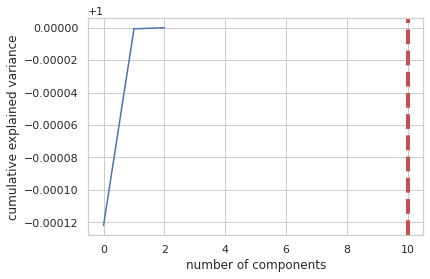

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.999878,9.998780e-01
1,0.999999,1.213055e-04
2,1.000000,6.492681e-07


[9.99878010e-01 1.21305488e-04 6.49268117e-07]
[1.72093056e+06 1.89552738e+04 1.38676182e+03]
LogisticRe
0.7666666666666667
XGBClassif
0.8166666666666667
GradientBo
0.8166666666666667
LinearDisc
0.7333333333333333
RandomFore
0.8666666666666667
KNeighbors
0.5
GaussianNB
0.8166666666666667
DecisionTr
0.8166666666666667
SVC(C=1.0,
0.55

 RandomFore
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.85      0.65      0.73        17

    accuracy                           0.87        60
   macro avg       0.86      0.80      0.82        60
weighted avg       0.86      0.87      0.86        60

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.83      0.59      0.69        17

    accuracy                           0.85        60
   macro avg       0.84      0.77      0.80        60
weighted avg       0.85      0.85      0.84        60

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, svd_solver='full')
pca.fit(x_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
testWAll(x_train_pca,y_train,x_test_pca,y_test)

clf.fit(x_train_pca,y_train)
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))

PCA Is Not Effective

Parameter Tuning on Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

randomForest = RandomForestClassifier()
clsf = RandomizedSearchCV(randomForest, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
clsf.fit(x_train, y_train)
y_pred = clsf.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60

